# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 12th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

a) Read the image "face.png" in the folder "images" and visualize the RGB image as well as each of its channels separately (R, G, and B).
Note: Before applying the histogram, you should pass the image into float.

In [2]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt, animation
from mpl_toolkits.mplot3d import Axes3D
from skimage import img_as_float
from skimage.exposure import histogram
from skimage.color import rgb2gray
from skimage.transform import rescale, resize
from scipy.ndimage import convolve
from skimage import feature
from skimage import filters
from matplotlib.animation import FuncAnimation

uint8
Type:  uint8  min:  0  max:  255
float:
Type:  float64  min:  0.0  max:  1.0


<ipython-input-22-092025b9f08c>:14: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  grayFace =rgb2gray(face)


(-0.5, 421.5, 349.5, -0.5)

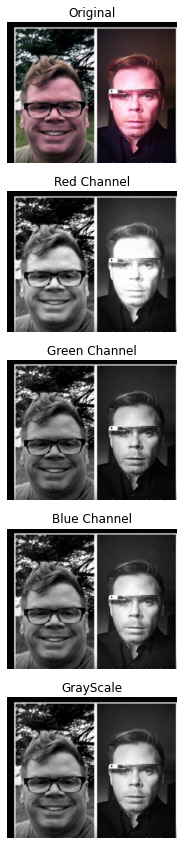

In [22]:
#your solution

#Read the image 
face=io.imread('images/face.png')
print('uint8')
print('Type: ', face.dtype, ' min: ', face.min(), ' max: ', face.max())

#this function allows us to change the type of the image to float, but copying it to another variable.
facefl = img_as_float(face)
#Visualize it
#plt.imshow(facefl)
print('float:')
print('Type: ', facefl.dtype, ' min: ', facefl.min(), ' max: ', facefl.max())
grayFace =rgb2gray(face)

#Visualize it
fig=plt.figure(figsize=(15,15))

fig.add_subplot(5,1,1)
plt.imshow(facefl,cmap='gray')
plt.title('Original')
plt.axis('off')

fig.add_subplot(5,1,2)
plt.imshow(facefl[:,:,0],cmap='gray')
plt.title('Red Channel')
plt.axis('off')

fig.add_subplot(5,1,3)
plt.imshow(facefl[:,:,1],cmap='gray')
plt.title('Green Channel')
plt.axis('off')

fig.add_subplot(5,1,4)
plt.imshow(facefl[:,:,2],cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

fig.add_subplot(5,1,5)
plt.imshow(grayFace,cmap='gray')
plt.title('GrayScale')
plt.axis('off')

b) Visualize the histogram of the image. What is the histogram representing for an image? 
The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

    - Obtain the histogram with 8 and 32 bins. 

    - Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

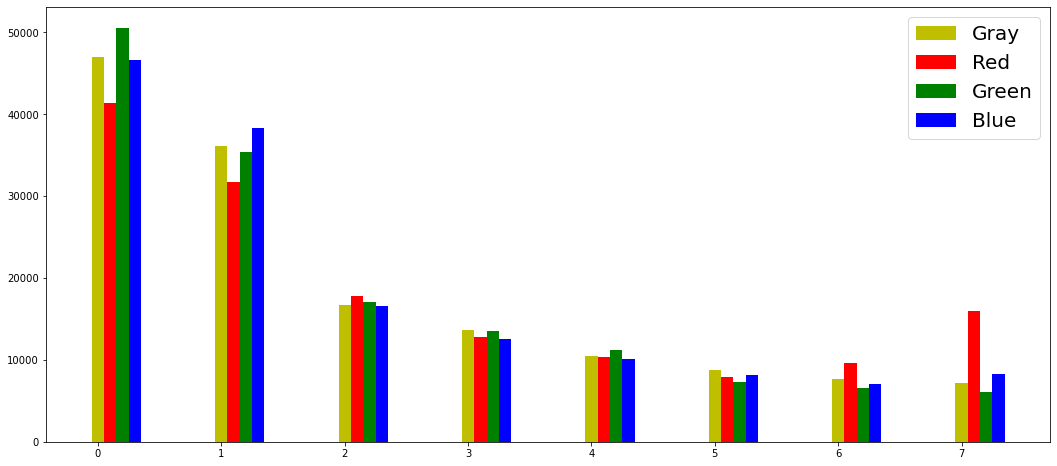

In [23]:
#your solution
numberOfBins = 8
#create the histogram
hst, bins = histogram(grayFace, nbins=numberOfBins)
hst_r, bins_r = histogram(facefl[:,:,0], nbins=numberOfBins)
hst_g, bins_g = histogram(facefl[:,:,1], nbins=numberOfBins)
hst_b, bins_b = histogram(facefl[:,:,2], nbins=numberOfBins)

ind = np.arange( numberOfBins)

fig = plt.figure(figsize=(18,8))
#we personalize the bars
cl = plt.bar( ind, hst, 0.1, color='y')
cl_r = plt.bar( ind+.1, hst_r, 0.1, color='r')
cl_g = plt.bar( ind+.2, hst_g,0.1, color='g')
cl_b = plt.bar( ind+.3, hst_b,0.1, color='b')
#we use the loc = 'best' parameter to assign the best position for the legend
plt.legend((cl[0],cl_r[0], cl_g[0], cl_b[0]), ('Gray','Red','Green','Blue'), loc='best', prop={'size': 20})
plt.show()

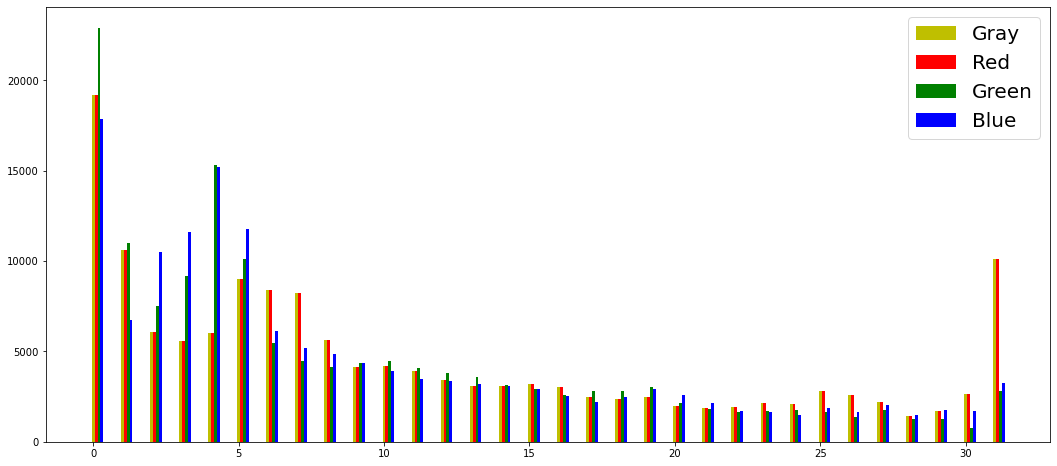

In [24]:
#your solution
numberOfBins = 32
#create the histogram
hst, bins = histogram(facefl, nbins=numberOfBins)
hst_r, bins_r = histogram(facefl[:,:,0], nbins=numberOfBins)
hst_g, bins_g = histogram(facefl[:,:,1], nbins=numberOfBins)
hst_b, bins_b = histogram(facefl[:,:,2], nbins=numberOfBins)

ind = np.arange( numberOfBins)

fig = plt.figure(figsize=(18,8))
#we personalize the bars
cl = plt.bar( ind, hst_r, 0.1, color='y')
cl_r = plt.bar( ind+.1, hst_r, 0.1, color='r')
cl_g = plt.bar( ind+.2, hst_g,0.1, color='g')
cl_b = plt.bar( ind+.3, hst_b,0.1, color='b')
#we use the loc = 'best' parameter to assign the best position for the legend
plt.legend((cl[0],cl_r[0], cl_g[0], cl_b[0]), ('Gray','Red','Green','Blue'), loc='best', prop={'size': 20})
plt.show()

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `face.png` and apply each of the following steps:

1. Convert it to grayscale with the function `color.rgb2gray()` of the package `skimage`.
2. Convolve it with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
3. Convolve the grayscale image in (1) with a transposed version of the mask in (2).
4. Convolve the grayscale image in (1) with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

**Visualize the output of each step (1 to 4) next to each other. Write short titles on each figure to make them understandable.**

#### Questions

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

Note: Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).

(350, 422, 4)


<ipython-input-25-33770f4336b5>:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img_gray = rgb2gray(img)


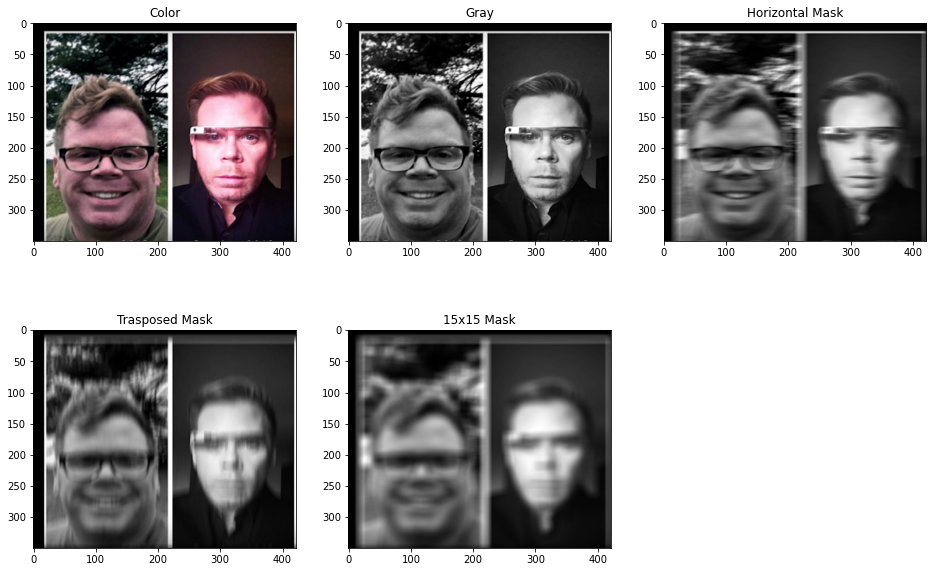

In [25]:
from skimage import io 
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

img = io.imread('images/face.png')
print(img.shape)
img_gray = rgb2gray(img)

mask_h1d = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
#we normalize the mask
mask_h1d = mask_h1d/np.sum(mask_h1d)

#we construct a convolved image with mask_h1d
img_smooth = convolve(img_gray, mask_h1d,mode='constant', cval=0.0)

mask_t = np.transpose(mask_h1d)

img_smooth_t = convolve(img_gray, mask_t,mode='constant', cval=0.0)
mask2 = [[(1)for x in range(15)] for y in range(15)] 
mask2 = mask2/np.sum(mask2)
img_4 = convolve(img_gray, mask2, mode='constant', cval=0.0)

fig = plt.figure(figsize=(16,16))

fig.add_subplot(3,3,1)
plt.title('Color')
plt.imshow(img) #Visualizing a figure with the image

fig.add_subplot(3,3,2)
plt.title('Gray')
plt.imshow(img_gray,cmap = 'gray') #Visualizing a figure with the image

fig.add_subplot(3,3,3)
plt.title('Horizontal Mask')
plt.imshow(img_smooth,cmap = 'gray') #Visualizing a figure with the image


fig.add_subplot(3,3,4)
plt.title('Trasposed Mask')
plt.imshow(img_smooth_t,cmap = 'gray') #Visualizing a figure with the image

fig.add_subplot(3,3,5)
plt.title('15x15 Mask')
plt.imshow(img_4,cmap = 'gray') #Visualizing a figure with the image

In [ ]:
"""
Questions
Observe and comment how the type and the range of values (max & min) changed when different
operations have been applied on the image.
The image is now float64 because we work with a grayscale image. Therefore, the range of values are now between
0 and 1.

Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image?
Compare the results.
It is important becasue in order to do a convolution we need to use a mask, both verticaly and horizontaly. We are after all...
convolving a mask over an image.
N dimentional mask creates a horizontal blur effect. 
Transponse mask creates a vertical blur effect. 
Two-dimentional mask creates a blur effect in both directions.

"""

b) Given a color image (im), what is the difference between ***1*** and ***2*** ?
   
*** 1. ***

im_2=np.array(im, dtype='float')


*** 2. ***

im_2=np.array(im)


im_2=img_as_float(im_2)

In [ ]:
"""
1 converts the elements of the array to float, without changing its range (from 0. to 255.), while 
2 does the correct conversion for skimage making the array elements range from 0 to 1.
"""

(350, 422, 4) float64


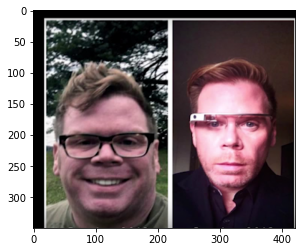

In [26]:
from skimage import img_as_float
img2 = io.imread('images/face.png')
#img=np.array(img2, dtype='float')

img3=np.array(img2)
img=img_as_float(img3)
print(img.shape, img.dtype)
#print(img)

plt.imshow(img) #Visualizing a figure with the image
plt.show()

c) Can we convolve a color (RGB) image? In order to convolve an RGB each of the channels must be convolved separately.

Implement a function that applies a 3-channel filter and visualize its result on `face.png` with a 15x15 uniform mask.

Note: Before applying the convolution assure that the color image is of 3 channels and if not use rgba2rgb().

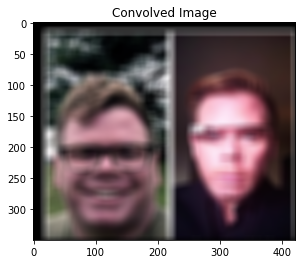

In [27]:
#your solution
from skimage import data
import numpy as np
from scipy.ndimage import convolve


mask = [[(1)for x in range(15)] for y in range(15)] 
mask = mask/np.sum(mask)

imgc = io.imread('images/face.png')

#each of the channels must be convolved separately
imgc[:,:,0]=convolve(imgc[:,:,0], mask, mode='constant', cval=0.0) 
imgc[:,:,1]=convolve(imgc[:,:,1], mask, mode='constant', cval=0.0)
imgc[:,:,2]=convolve(imgc[:,:,2], mask, mode='constant', cval=0.0)

plt.imshow(imgc)
plt.title('Convolved Image')
plt.show()


### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce it 10 times
2. Augment it 10 times. 
3. Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why.

Note: Use the command `resize` to change the size of the images.


(-0.5, 2869.5, 2529.5, -0.5)

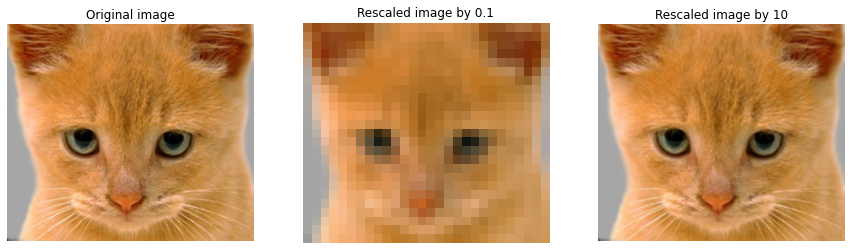

In [28]:
#your solution
#Read the image 
cat=io.imread('images/cat.jpg')
#using the resize command from skimage
cat2= resize(cat, (cat.shape[0] // 10, cat.shape[1] // 10))#Reduce it 10 times
cat3= resize(cat, (cat.shape[0] * 10, cat.shape[1] * 10))#Augment it 10 times

#Visualize it
fig=plt.figure(figsize=(15,15))

fig.add_subplot(2,3,1)
plt.imshow(cat, cmap='gray')
plt.title('Original image')
plt.axis('off')

fig.add_subplot(2,3,2)
plt.imshow(cat2, cmap='gray')
plt.title('Rescaled image by 0.1')
plt.axis('off')

fig.add_subplot(2,3,3)
plt.imshow(cat3, cmap='gray')
plt.title('Rescaled image by 10')
plt.axis('off')

#we will show the histogram on the next cell

<ipython-input-29-6e5b52b2109c>:8: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hst1 = histogram(cat,  nbins = numberOfBins)
<ipython-input-29-6e5b52b2109c>:9: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hst2 = histogram(cat2, nbins = numberOfBins)
<ipython-input-29-6e5b52b2109c>:10: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hst3 = histogram(cat3, nbins = numberOfBins)


Text(0.5, 1.0, 'Rescaled by 10 histogram')

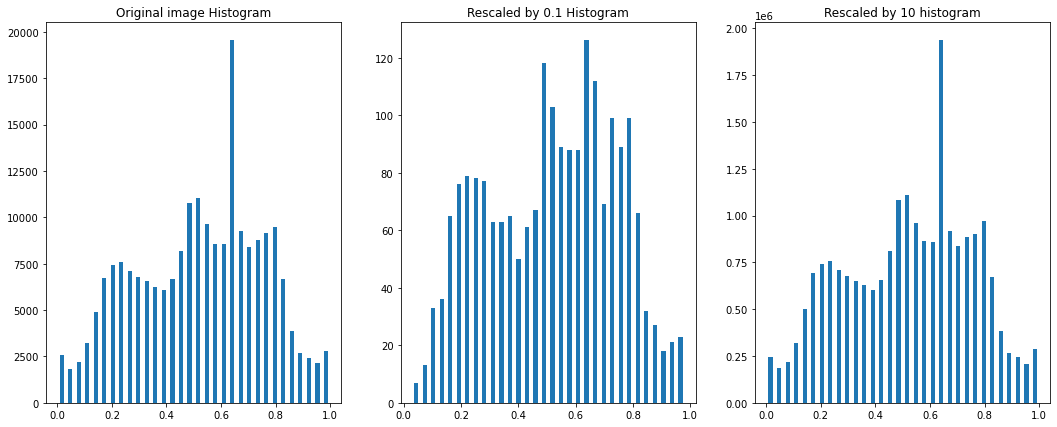

In [29]:
numberOfBins = 32
#we convert it to float, so we can use it on the histogram
cat = img_as_float(cat)
cat2 = img_as_float(cat2)
cat3 = img_as_float(cat3)

#we create each histogram
hst1 = histogram(cat,  nbins = numberOfBins)
hst2 = histogram(cat2, nbins = numberOfBins)
hst3 = histogram(cat3, nbins = numberOfBins)

#visualize it
fig=plt.figure(figsize=(18,7))

fig.add_subplot(1,3,1)
plt.bar(hst1[1],hst1[0], width=0.015) #we add the third parameter "width," so we can see the bars better
plt.title('Original image Histogram')

fig.add_subplot(1,3,2)
plt.bar(hst2[1],hst2[0], width=0.015)
plt.title('Rescaled by 0.1 Histogram')

fig.add_subplot(1,3,3)
plt.bar(hst3[1],hst3[0], width=0.015)
plt.title('Rescaled by 10 histogram')


In [ ]:
"""
We can see that the original image and the augmented by 10 look fairly similiar, but not quite. There are some variation for
the values in frequencies. When we look at the image reduced by 10 (0.1), we can see the variation in frequencies are much
different than that of the original image, and it appears to have more noise.
"""

b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original image and calculate its histogram.
2. Convolve the  reduced image 10 times and calculate its histogram.
3. Convolve the  augmented image 10 times and calculate its histogram.

<ipython-input-30-df3937d8c5cd>:12: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hst1 = histogram(cat,  nbins = numberOfBins)
<ipython-input-30-df3937d8c5cd>:13: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hst2 = histogram(cat_convolved, nbins = numberOfBins)
<ipython-input-30-df3937d8c5cd>:14: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hst3 = histogram(convolve_reduced, nbins = numberOfBins)
<ipython-input-30-df3937d8c5cd>:15: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hst4 = histogram(convolve_augmented, nbins = numberOfBins)
Clipping 

Text(0.5, 1.0, 'Augmented Convoluted Histogram')

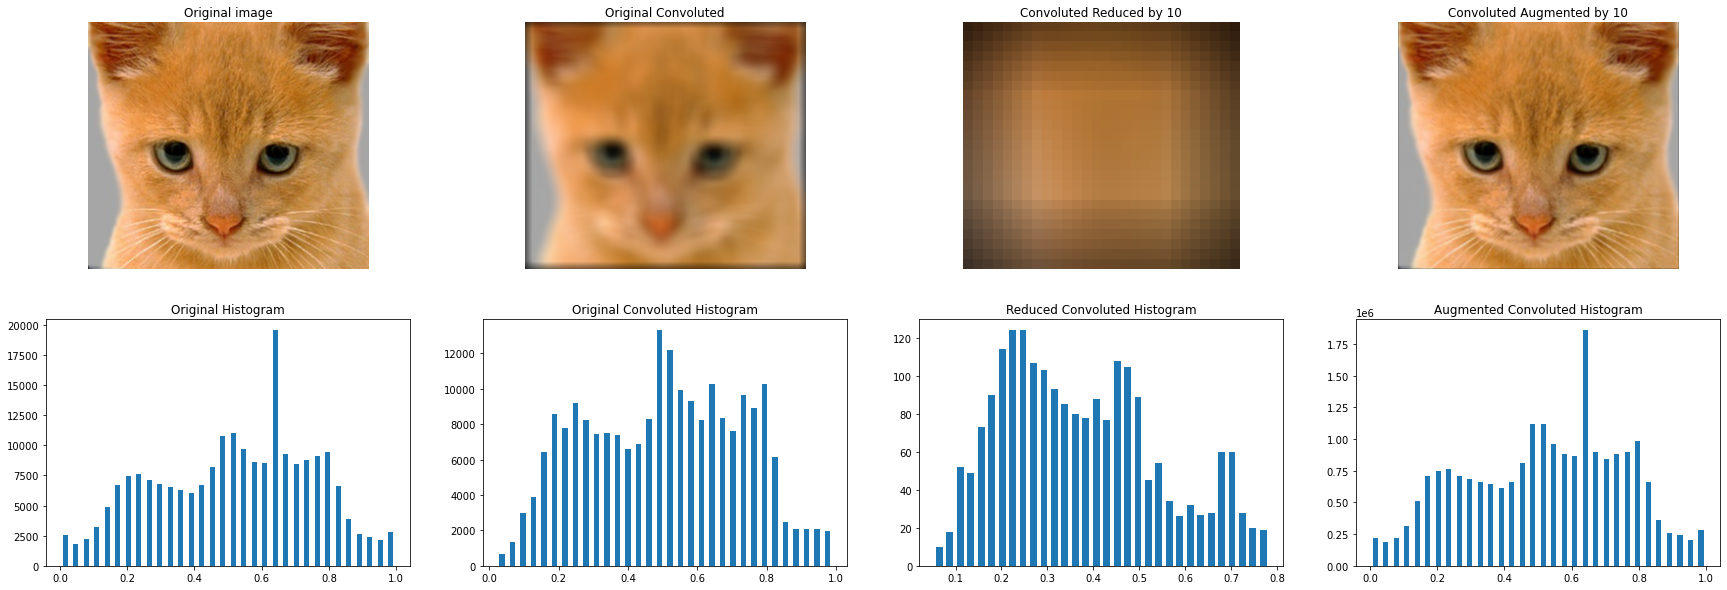

In [30]:
#your solution
#we create a 15x15 uniform mask, as asked
mask = np.zeros((15,15),dtype=np.uint8)
mask[:,:] = 1 #we put it all to 1, cause its uniformed and it shouldnt be zero
mask = mask/np.sum(mask) #we normalize to avoid problems
mask = mask[:,:,None] #since it needs to have a third dimension, we just add an irrelevant one

cat_convolved = convolve(cat, mask, mode='constant', cval=0.0)
convolve_reduced = convolve(cat2, mask, mode='constant', cval=0.0)
convolve_augmented = convolve(cat3, mask, mode='constant', cval=0.0)

hst1 = histogram(cat,  nbins = numberOfBins)
hst2 = histogram(cat_convolved, nbins = numberOfBins)
hst3 = histogram(convolve_reduced, nbins = numberOfBins)
hst4 = histogram(convolve_augmented, nbins = numberOfBins)

#Visualize it
fig=plt.figure(figsize=(30,10))

fig.add_subplot(2,4,1)
plt.imshow(cat, cmap='gray')
plt.title('Original image')
plt.axis('off')

fig.add_subplot(2,4,2)
plt.imshow(cat_convolved, cmap='gray')
plt.title('Original Convoluted')
plt.axis('off')

fig.add_subplot(2,4,3)
plt.imshow(convolve_reduced, cmap='gray')
plt.title('Convoluted Reduced by 10')
plt.axis('off')

fig.add_subplot(2,4,4)
plt.imshow(convolve_augmented, cmap='gray')
plt.title('Convoluted Augmented by 10')
plt.axis('off')

fig.add_subplot(2,4,5)
plt.bar(hst1[1],hst1[0], width=0.015) #we add the third parameter "width," so we can see the bars better
plt.title('Original Histogram')

fig.add_subplot(2,4,6)
plt.bar(hst2[1],hst2[0], width=0.015)
plt.title('Original Convoluted Histogram')

fig.add_subplot(2,4,7)
plt.bar(hst3[1],hst3[0], width=0.015)
plt.title('Reduced Convoluted Histogram')

fig.add_subplot(2,4,8)
plt.bar(hst4[1],hst4[0], width=0.015)
plt.title('Augmented Convoluted Histogram')

In [43]:
"""
We can come to the conclusion that the smaller the image, the bigger the effect of the convolution because the mask has more
effect. Notice how the convoluted Augmented image looks fairly similar to the original image while the Original Convoluded 
images looks different(in the histogram too). Since the augmented one is bigger, the mask has less effect while the 
Original Convoluted suffers more changes since the size is same. Meanwhile, the reduced image has the greatest changes becuase
its the smallest.
"""

'\nWe can come to the conclusion that the smaller the image, the bigger the effect of the convolution because the mask has more\neffect. Notice how the convoluted Augmented image looks fairly similar to the original image while the Original Convoluded \nimages looks different(in the histogram too). Since the augmented one is bigger, the mask has less effect while the \nOriginal Convoluted suffers more changes since the size is same. Meanwhile, the reduced image has the greatest changes becuase\nits the smallest.\n'

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `face.png`:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

Hint: search for the skimage.filters function for creating the different filters.

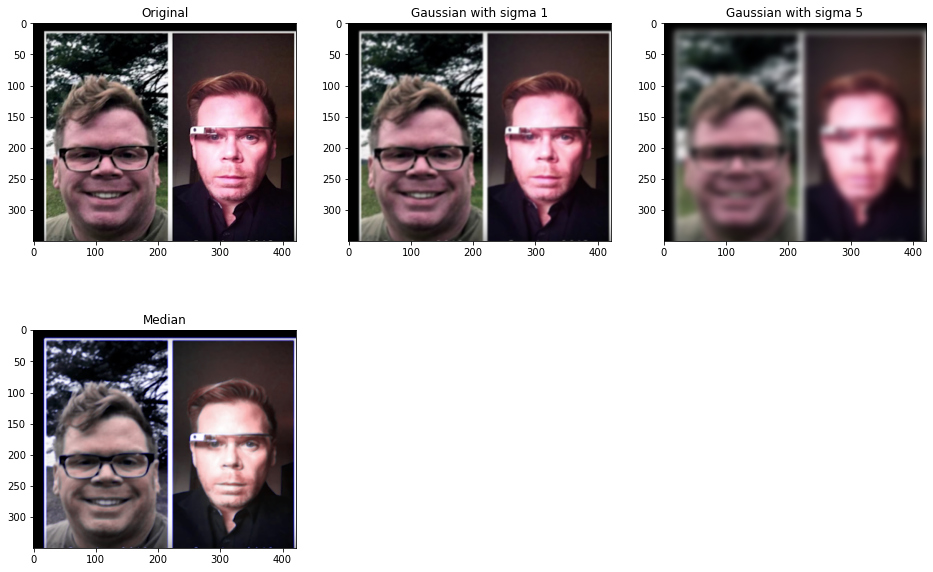

In [31]:
#your solution
# Every filter works best depending on the type of noise; gaussian mask
# is intended for gaussian noise whereas median filter works best with salt and peper noise.

from scipy.ndimage import gaussian_filter
from skimage.filters import gaussian
from skimage.filters import median
from skimage.color import rgba2rgb

img_ = io.imread('images/face.png')

#we apply gauss with diferent sigma values
img_G1 = gaussian(img_,sigma = 1, multichannel=True)
img_G1V2 = gaussian(img_,sigma = 5, multichannel=True)
img_M = median(img_)#we apply the median filter

#We plot the images
fig = plt.figure(figsize=(16,16))

fig.add_subplot(3,3,1)
plt.title('Original')
plt.imshow(img_) #Visualizing a figure with the image

fig.add_subplot(3,3,2)
plt.title('Gaussian with sigma 1')
plt.imshow(img_G1) #Visualizing a figure with the image

fig.add_subplot(3,3,3)
plt.title('Gaussian with sigma 5')
plt.imshow(img_G1V2)#Visualizing a figure with the image

fig.add_subplot(3,3,4)
plt.title('Median')
plt.imshow(img_M)#Visualizing a figure with the image


In [15]:
"""
Which is the most adequate value for keeping the main objects and structures of the image?

Comment the effect of using different kinds of filters on the original image.
"""

'\nWhich is the most adequate value for keeping the main objects and structures of the image?\n\nComment the effect of using different kinds of filters on the original image.\n'

b) **(Optional)** Apply the smoothing on some other images and present their results.

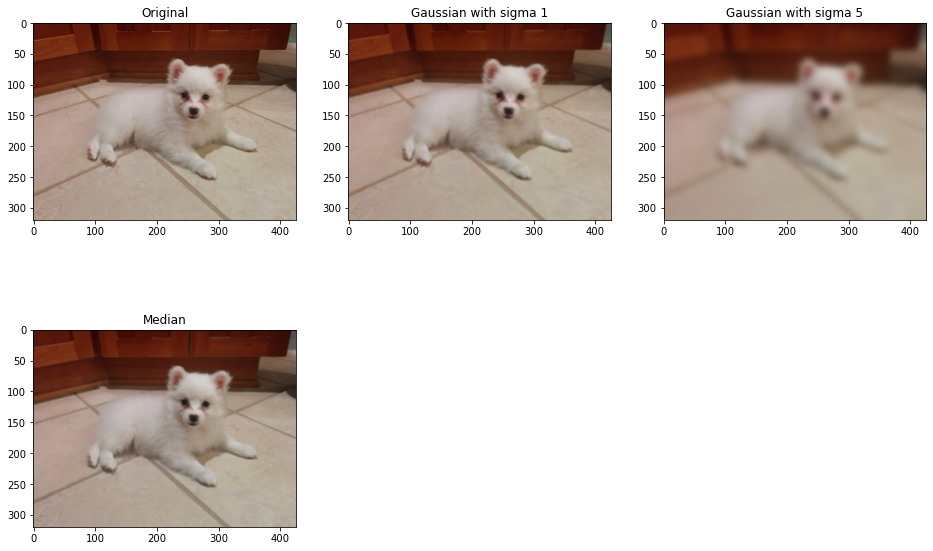

In [32]:
#your solution
img_ = io.imread('images/dog.jpg')

#we apply gauss with diferent sigma values
img_G1 = gaussian(img_,sigma = 1, multichannel=True)
img_G1V2 = gaussian(img_,sigma = 5, multichannel=True)
img_M = median(img_)#we apply the median filter

#We plot the images
fig = plt.figure(figsize=(16,16))

fig.add_subplot(3,3,1)
plt.title('Original')
plt.imshow(img_) #Visualizing a figure with the image

fig.add_subplot(3,3,2)
plt.title('Gaussian with sigma 1')
plt.imshow(img_G1) #Visualizing a figure with the image

fig.add_subplot(3,3,3)
plt.title('Gaussian with sigma 5')
plt.imshow(img_G1V2)#Visualizing a figure with the image

fig.add_subplot(3,3,4)
plt.title('Median')
plt.imshow(img_M)#Visualizing a figure with the image


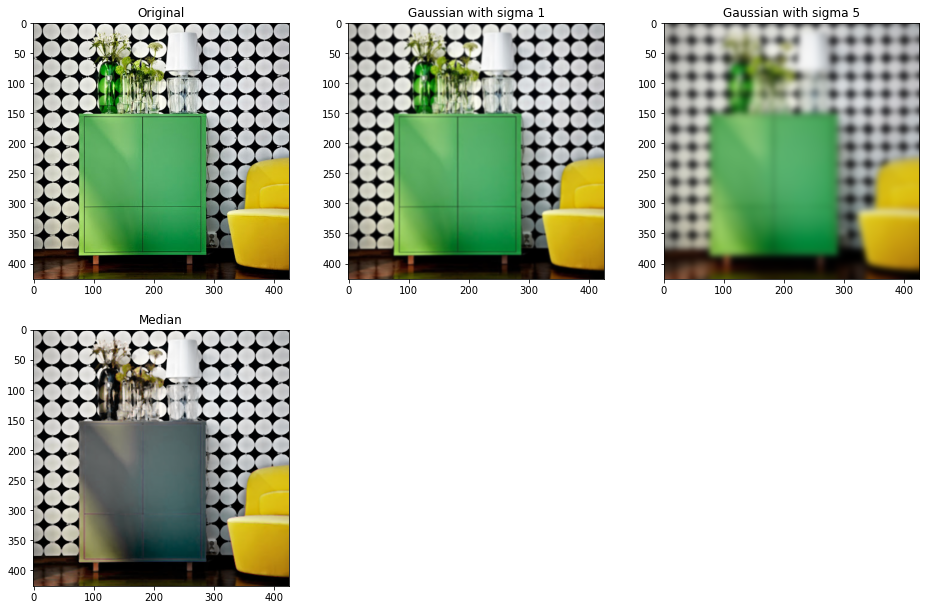

In [33]:
#your solution
img_ = io.imread('images/buffet.jpg')

#we apply gauss with diferent sigma values
img_G1 = gaussian(img_,sigma = 1, multichannel=True)
img_G1V2 = gaussian(img_,sigma = 5, multichannel=True)
img_M = median(img_)#we apply the median filter

#We plot the images
fig = plt.figure(figsize=(16,16))

fig.add_subplot(3,3,1)
plt.title('Original')
plt.imshow(img_) #Visualizing a figure with the image

fig.add_subplot(3,3,2)
plt.title('Gaussian with sigma 1')
plt.imshow(img_G1) #Visualizing a figure with the image

fig.add_subplot(3,3,3)
plt.title('Gaussian with sigma 5')
plt.imshow(img_G1V2)#Visualizing a figure with the image

fig.add_subplot(3,3,4)
plt.title('Median')
plt.imshow(img_M)#Visualizing a figure with the image


### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Roberts.
2. Prewitt
3. Sobel
4. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

<ipython-input-39-f4496b29b339>:6: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  logo2D = rgb2gray(logo)


(-0.5, 224.5, 224.5, -0.5)

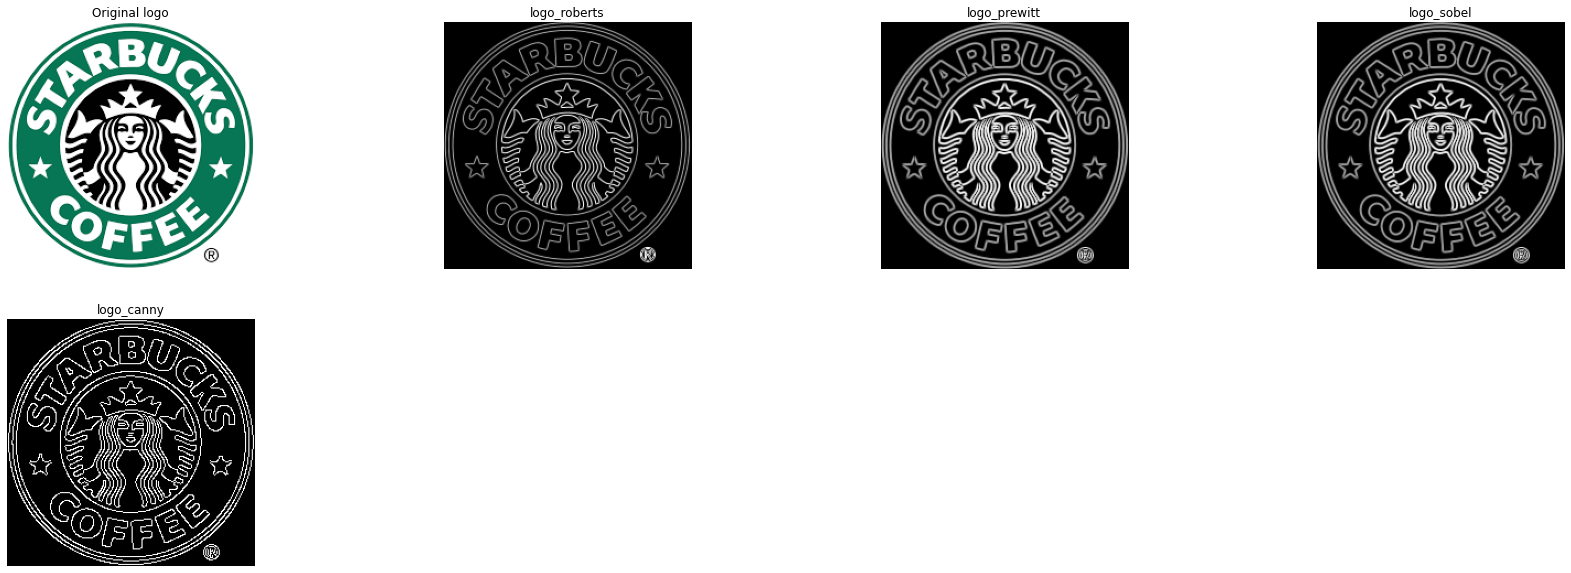

In [39]:
#your solution
#Read the image 
logo=io.imread('images/logo.png')

#in order to use these functions, the image must be 2D. We can fix this by converting the image to grayscale
logo2D = rgb2gray(logo)

#Apply the different contour extraction tecniques
logo_roberts = filters.roberts(logo2D)
logo_prewitt = filters.prewitt(logo2D)
logo_sobel = filters.sobel(logo2D)
logo_canny = feature.canny(logo2D, sigma=0.1) #the canny function needs a sigma parameter
#the bigger the parameter sigma, the less edges we will see. If we use sigma = 10;for example, we would see a black square

#Visualize it
fig=plt.figure(figsize=(30,10))

fig.add_subplot(2,4,1)
plt.imshow(logo, cmap='gray')
plt.title('Original logo')
plt.axis('off')

fig.add_subplot(2,4,2)
plt.imshow(logo_roberts, cmap='gray')
plt.title('logo_roberts')
plt.axis('off')

fig.add_subplot(2,4,3)
plt.imshow(logo_prewitt, cmap='gray')
plt.title('logo_prewitt')
plt.axis('off')

fig.add_subplot(2,4,4)
plt.imshow(logo_sobel, cmap='gray')
plt.title('logo_sobel')
plt.axis('off')

fig.add_subplot(2,4,5)
plt.imshow(logo_canny, cmap='gray')
plt.title('logo_canny')
plt.axis('off')

In [ ]:
"""
Which is the best countour detection technique?
I guess it depends of the picture, for the logo, it might seem like canny looks the worst, compared to the others.
However, in seccion "b" we can see that, with the Orca picture, the canny technique works better. In any case,
Canny is the most sophisticated one.

Which are the optimal parameters for this image?
Usually, when we use canny, the smaller the parameter, the more edges we can see. Still, in regards to what looks better?
the sigma value depends on the image.

Is it necessary to normalize the mask as we do in the filtering applied for the smoothing?
Depends of what we want. If we want to visualize an image, absolutely, otherwise we could get an irrecognisable image.
Usually I would recommend to normalize the mask just in case, to avoid problems.

"""

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

(-0.5, 999.5, 666.5, -0.5)

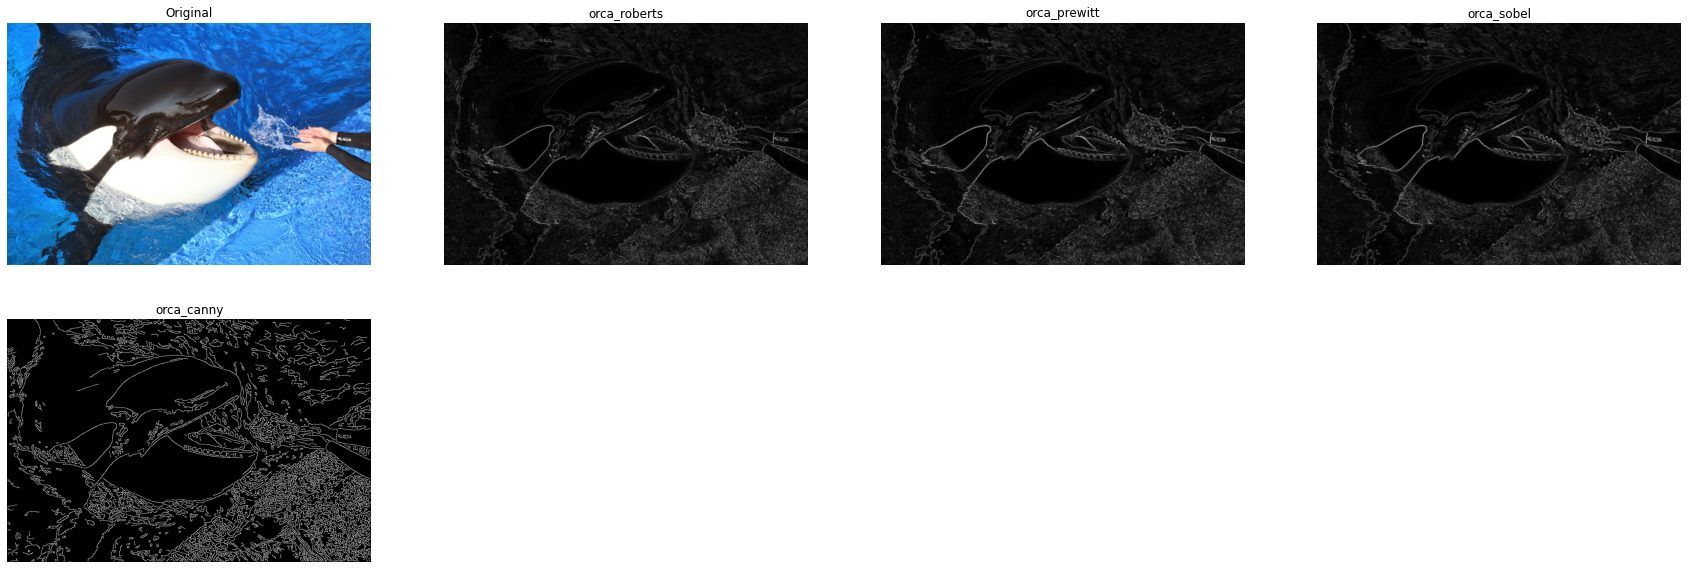

In [40]:
#your solution
#Read the image 
orca=io.imread('images/doulphin.jpg')

#in order to use these functions, the image must be 2D. We can fix this by converting the image to grayscale
orca2D = rgb2gray(orca)

orca_roberts = filters.roberts(orca2D)
orca_prewitt = filters.prewitt(orca2D)
orca_sobel = filters.sobel(orca2D)
orca_canny = feature.canny(orca2D, sigma=1.5) #the canny function needs a sigma parameter
#the bigger the parameter sigma, the less edges we will see. If we use sigma = 10;for example, we would see a black square

#Visualize it
fig=plt.figure(figsize=(30,10))

fig.add_subplot(2,4,1)
plt.imshow(orca, cmap='gray')
plt.title('Original')
plt.axis('off')

fig.add_subplot(2,4,2)
plt.imshow(orca_roberts, cmap='gray')
plt.title('orca_roberts')
plt.axis('off')

fig.add_subplot(2,4,3)
plt.imshow(orca_prewitt, cmap='gray')
plt.title('orca_prewitt')
plt.axis('off')

fig.add_subplot(2,4,4)
plt.imshow(orca_sobel, cmap='gray')
plt.title('orca_sobel')
plt.axis('off')

fig.add_subplot(2,4,5)
plt.imshow(orca_canny, cmap='gray')
plt.title('orca_canny')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

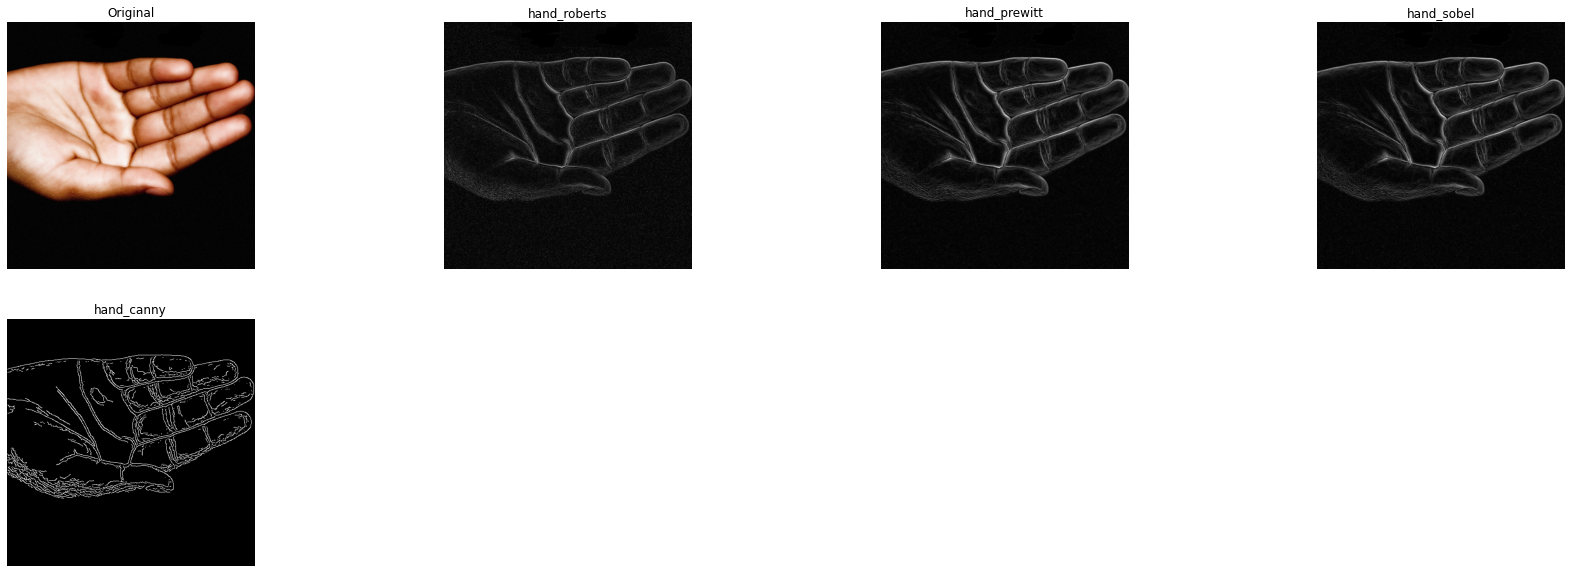

In [41]:
#Read the image 
hand=io.imread('images/hand.jpg')

#in order to use these functions, the image must be 2D. We can fix this by converting the image to grayscale
hand2D = rgb2gray(hand)

hand_roberts = filters.roberts(hand2D)
hand_prewitt = filters.prewitt(hand2D)
hand_sobel = filters.sobel(hand2D)
hand_canny = feature.canny(hand2D, sigma=0.8) #the canny function needs a sigma parameter
#the bigger the parameter sigma, the less edges we will see. If we use sigma = 10;for example, we would see a black square

#Visualize it
fig=plt.figure(figsize=(30,10))

fig.add_subplot(2,4,1)
plt.imshow(hand, cmap='gray')
plt.title('Original')
plt.axis('off')

fig.add_subplot(2,4,2)
plt.imshow(hand_roberts, cmap='gray')
plt.title('hand_roberts')
plt.axis('off')

fig.add_subplot(2,4,3)
plt.imshow(hand_prewitt, cmap='gray')
plt.title('hand_prewitt')
plt.axis('off')

fig.add_subplot(2,4,4)
plt.imshow(hand_sobel, cmap='gray')
plt.title('hand_sobel')
plt.axis('off')

fig.add_subplot(2,4,5)
plt.imshow(hand_canny, cmap='gray')
plt.title('hand_canny')
plt.axis('off')

In [35]:
"""
Are the contours improved if the image is previously smoothed ?
Yes becuase if the image is previously smoothed, it is easier to find the edges because there is less noise, 
so it should be more accurate.

Which are the limitations of the different images contour extraction?
For example, when we use canny on complicated images such as the Orca we need to increase the Sigma value becuase 
of the noise. A small value of sigma will make an image with a lot of noise, and we wont recognize anything on the image.
Still, canny is better at noise detection than the others. 

With Sobel is noise sentitive. The magnitude of the edges will degrade as the level of noise present in image increases,
which is something we can see with the Orca example, we see less edges. The same thing happens with Robert and Prewitt,
but prewitt is slighty better because it uses the average between pixels, but still not as good as Canny. 
"""

'\nAre the contours improved if the image is previously smoothed ?\nWhich are the limitations of the different images contour extraction?\n'

c) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


(-0.5, 511.5, 383.5, -0.5)

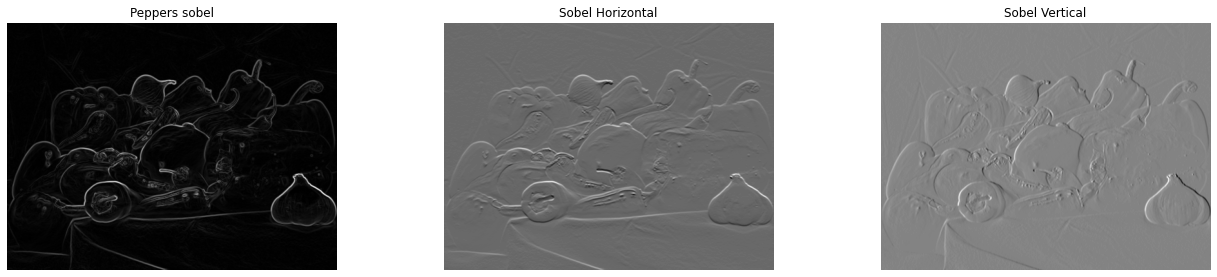

In [42]:
#your solution
#Read the image 
peppers=io.imread('images/peppers.png')

#in order to use these functions, the image must be 2D. We can fix this by converting the image to grayscale
peppers2D = rgb2gray(peppers)
#There are three ways to do sobel, Sobel, Vertical Sobel, and Horizontal Sobel.
peppers_sobel = filters.sobel(peppers2D)
peppers_x=filters.sobel_h(peppers2D)
peppers_y=filters.sobel_v(peppers2D)

#Visualize it
fig=plt.figure(figsize=(30,10))

fig.add_subplot(2,4,1)
plt.imshow(peppers_sobel, cmap='gray')
plt.title('Peppers sobel')
plt.axis('off')

fig.add_subplot(2,4,2)
plt.imshow(peppers_x, cmap='gray')
plt.title('Sobel Horizontal')
plt.axis('off')

fig.add_subplot(2,4,3)
plt.imshow(peppers_y, cmap='gray')
plt.title('Sobel Vertical')
plt.axis('off')

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

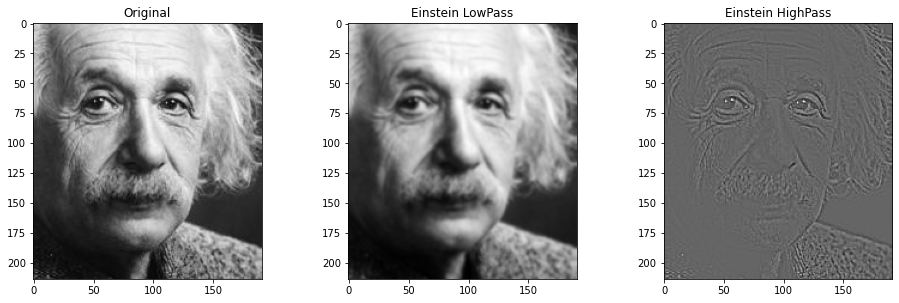

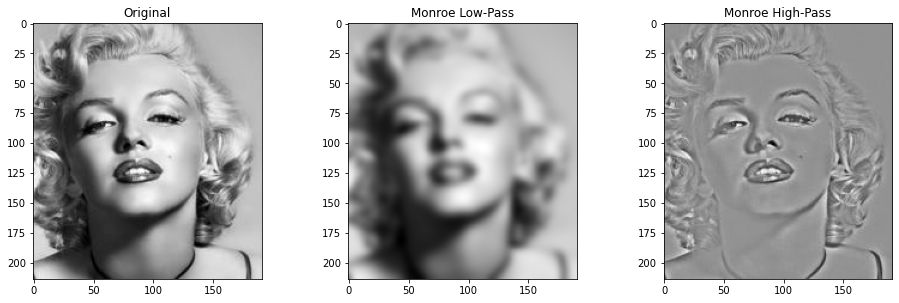

In [43]:
#your solution
from skimage import img_as_float
from skimage import filters

#read images
img_einstein = img_as_float(io.imread('images/Einstein.jpg'))
img_monroe = img_as_float(io.imread('images/monroe.jpg'))

#apply low pass
einstein_l = filters.gaussian(img_einstein, sigma=1)
monroe_3 = filters.gaussian(img_monroe, sigma=3)

#apply high pass
einstein_h1 = img_einstein - einstein_l
monroe_h3 = img_monroe - monroe_3

#visualize
fig = plt.figure(figsize=(16,16))

fig.add_subplot(3,3,1)
plt.title('Original')
plt.imshow(img_einstein, cmap='gray')

fig.add_subplot(3,3,2)
plt.title('Einstein LowPass')
plt.imshow(einstein_l, cmap='gray')

fig.add_subplot(3,3,3)
plt.title('Einstein HighPass')
plt.imshow(einstein_h1, cmap='gray')

fig = plt.figure(figsize=(16,16))

fig.add_subplot(3,3,1)
plt.title('Original')
plt.imshow(img_monroe, cmap='gray')

fig.add_subplot(3,3,2)
plt.title('Monroe Low-Pass')
plt.imshow(monroe_3, cmap='gray')

fig.add_subplot(3,3,3)
plt.title('Monroe High-Pass')
plt.imshow(monroe_h3, cmap='gray')

b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

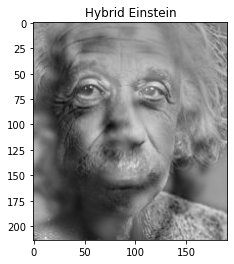

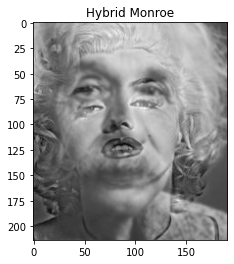

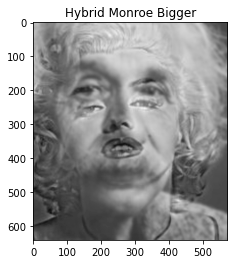

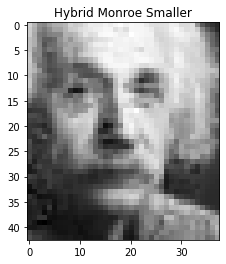

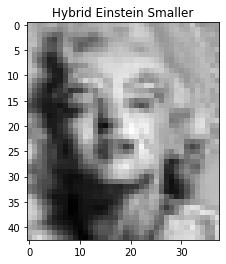

In [44]:
#your solution
#If we wish to see Monroe better we better utilize her image as the high pass.
#That way it doesn't get blurred and its silhouet stands out better.
from skimage.transform import rescale

#low pass and high pass
einstein_5 = filters.gaussian(img_einstein, sigma=5)
einstein_h5 = img_einstein - einstein_5

hybrid_e = monroe_3 + einstein_h5 #Hybrid Einstein
hybrid_m = einstein_l + monroe_h3 #Hybrid Monroe

rescaled = rescale(hybrid_m, 3) #make Monroe Einstein bigger
rescaledm = rescale(hybrid_m, 0.2) #make Monroe Einstein smaller
rescalede = rescale(hybrid_e, 0.2) #make Hybrid Einstein smaller

#visualize
plt.imshow(hybrid_e, cmap='gray')
plt.title('Hybrid Einstein')
plt.show()

plt.imshow(hybrid_m, cmap='gray')
plt.title('Hybrid Monroe')
plt.show()

plt.imshow(rescaled,cmap='gray')
plt.title('Hybrid Monroe Bigger')
plt.show()

plt.imshow(rescaledm,cmap='gray')
plt.title('Hybrid Monroe Smaller')
plt.show()

plt.imshow(rescalede,cmap='gray')
plt.title('Hybrid Einstein Smaller')
plt.show()

In [ ]:
"""
1.Analyze which is the best way of showing it if our aim is to see Marylin Monroe.
The best way to see Monroe is with Hybrid Monroe (einstein_l + monroe_h3). With Hybrid Einstein you can still see Monroe,
but only from afar, and it not as deteiled. However...

2.Additionally, rescale the image to a different size and comment the results
...We can see that if we rescale Hybrid Monroe to a smaller version, we will se Einstain better while
If we rescale the Hybrid einstein to a smaller version, we will se Monroe. IF we increase the size of the image tho, there 
is no major difference.
"""

c) **(Optional)**

Compute hybrid images from other images. Apply it over color images.

In [ ]:
#your solution

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code, you do not need to implement anything.

<IPython.core.display.Javascript object>


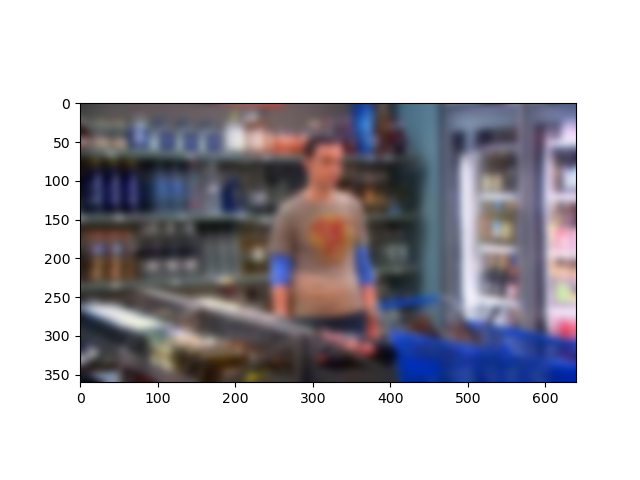

In [45]:
#your solution
%matplotlib nbagg 
from skimage.filters import gaussian

#we load the images
ic = io.ImageCollection('images/bigbangcollection/frame*.png')
all_frames = len(ic)

#to do the animation
def update(frame):
    blur = gaussian(ic[frame], sigma=5)#we blur the image at a specific frame using gaussian with sigma 5
    video.set_array(blur) #we set the array to video using the new blur value
    return video

fig = plt.figure()
video = plt.imshow(ic[0], animated = True) #we define the first frame for the video
ani = FuncAnimation(fig, update, frames=all_frames, repeat = False)
plt.show()